# Advanced Search Algorithm

### A* Search

In [2]:
grid = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],  # 0 are free path whereas 1's are obstacles
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0],
]

"""
heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]"""

init = [0, 0]
goal = [len(grid) - 1, len(grid[0]) - 1]  # all coordinates are given in format [y,x]
cost = 1

# the cost map which pushes the path closer to the goal
heuristic = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]


for i in range(len(grid)):
    for j in range(len(grid[0])):
        heuristic[i][j] = abs(i - goal[0]) + abs(j - goal[1])
        if grid[i][j] == 1:
            heuristic[i][j] = 99  # added extra penalty in the heuristic map


# the actions we can take
delta = [[-1, 0], [0, -1], [1, 0], [0, 1]]  # go up  # go left  # go down  # go right

In [3]:
# function to search the path
def search(grid, init, goal, cost, heuristic):

    closed = [
        [0 for col in range(len(grid[0]))] for row in range(len(grid))
    ]  # the referrence grid
    
    closed[init[0]][init[1]] = 1
    
    action = [
        [0 for col in range(len(grid[0]))] for row in range(len(grid))
    ]  # the action grid

    x = init[0]
    y = init[1]
    g = 0
    f = g + heuristic[init[0]][init[0]]
    cell = [[f, g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False  # flag set if we can't find expand

    while not found and not resign:
        if len(cell) == 0:
            resign = True
            return "FAIL"
        else:
            cell.sort()  # to choose the least costliest action so as to move closer to the goal
            cell.reverse()
            next = cell.pop()
            x = next[2]
            y = next[3]
            g = next[1]
            f = next[0]

            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):  # to try out different valid actions
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >= 0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            f2 = g2 + heuristic[x2][y2]
                            cell.append([f2, g2, x2, y2])
                            closed[x2][y2] = 1
                            action[x2][y2] = i
    invpath = []
    x = goal[0]
    y = goal[1]
    invpath.append([x, y])  # we get the reverse path from here
    while x != init[0] or y != init[1]:
        x2 = x - delta[action[x][y]][0]
        y2 = y - delta[action[x][y]][1]
        x = x2
        y = y2
        invpath.append([x, y])

    path = []
    for i in range(len(invpath)):
        path.append(invpath[len(invpath) - 1 - i])
    print("ACTION MAP")
    for i in range(len(action)):
        print(action[i])

    return path

In [4]:
a = search(grid, init, goal, cost, heuristic)
for i in range(len(a)):
    print(a[i])

ACTION MAP
[0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 3, 3]
[2, 0, 0, 0, 0, 2]
[2, 3, 3, 3, 0, 2]
[0, 0]
[1, 0]
[2, 0]
[3, 0]
[4, 0]
[4, 1]
[4, 2]
[4, 3]
[3, 3]
[2, 3]
[2, 4]
[2, 5]
[3, 5]
[4, 5]


### Shortest Path

In [5]:
class Graph:
    def __init__(self):
        self.vertex = {}

    # for printing the Graph vertexes
    def printGraph(self):
        for i in self.vertex.keys():
            print(i, " -> ", " -> ".join([str(j) for j in self.vertex[i]]))

    # for adding the edge beween two vertexes
    def addEdge(self, fromVertex, toVertex):
        # check if vertex is already present,
        if fromVertex in self.vertex.keys():
            self.vertex[fromVertex].append(toVertex)
        else:
            # else make a new vertex
            self.vertex[fromVertex] = [toVertex]

    def BFS(self, startVertex):
        # Take a list for stoting already visited vertexes
        visited = [False] * len(self.vertex)

        # create a list to store all the vertexes for BFS
        queue = []

        # mark the source node as visited and enqueue it
        visited[startVertex] = True
        queue.append(startVertex)

        while queue:
            startVertex = queue.pop(0)
            print(startVertex, end=" ")

            # mark all adjacent nodes as visited and print them
            for i in self.vertex[startVertex]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True

In [6]:
if __name__ == "__main__":
    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    g.printGraph()
    print("BFS:")
    g.BFS(2)

    # OUTPUT:
    # 0  ->  1 -> 2
    # 1  ->  2
    # 2  ->  0 -> 3
    # 3  ->  3
    # BFS:
    # 2 0 3 1


0  ->  1 -> 2
1  ->  2
2  ->  0 -> 3
3  ->  3
BFS:
2 0 3 1 

### Implementation of NetworkX

In [47]:
import networkx as nx
import pandas as pd
import numpy as np
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [48]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

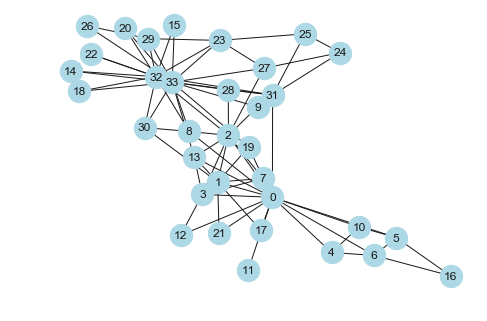

In [53]:
G = nx.karate_club_graph()
nx.draw(G, node_size = 500, node_color = "lightblue", with_labels = True)

In [54]:
nx.shortest_path(G,16,26)

[16, 5, 0, 8, 33, 26]

In [61]:
path = nx.shortest_path(G,16,26)
path_edges = []
for i in range(len(path)-1):
    path_edges.append((path[i],path[i+1]))
path_edges

[(16, 5), (5, 0), (0, 8), (8, 33), (33, 26)]

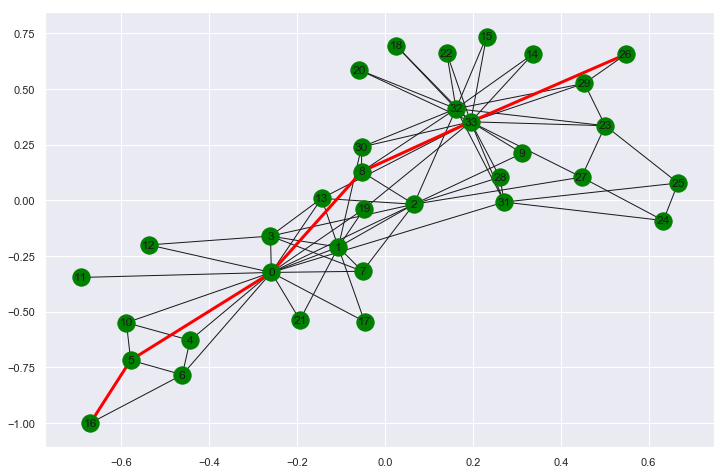

In [62]:
pos =nx.spring_layout(G)
plt.figure(figsize = [12,8])
nx.draw_networkx_edges(G,pos)

nx.draw_networkx_edges(G, pos, edge_color = "red",\
                       width =3,\
                       edgelist = path_edges)

nx.draw_networkx_nodes(G,pos, node_color='green')
nx.draw_networkx_labels(G,pos,with_labels=True)
plt.show()

In [63]:
list(nx.all_shortest_paths(G,0,26))

[[0, 8, 33, 26], [0, 13, 33, 26], [0, 19, 33, 26], [0, 31, 33, 26]]

--------

### References:
1. Latest Algorithm Collection GitHub:https://github.com/TheAlgorithms/Python
2. AI search GitHub book:https://github.com/aimacode
3. Algorithm Online Book: https://algs4.cs.princeton.edu/home/
4. NetworkX documents: https://networkx.github.io/documentation/latest/index.html
5. Network Science Online Book: http://networksciencebook.com/